# SENTIMENTAL ANALYSIS AMAZON MUSICAL INSTRUMENT REVIEWS

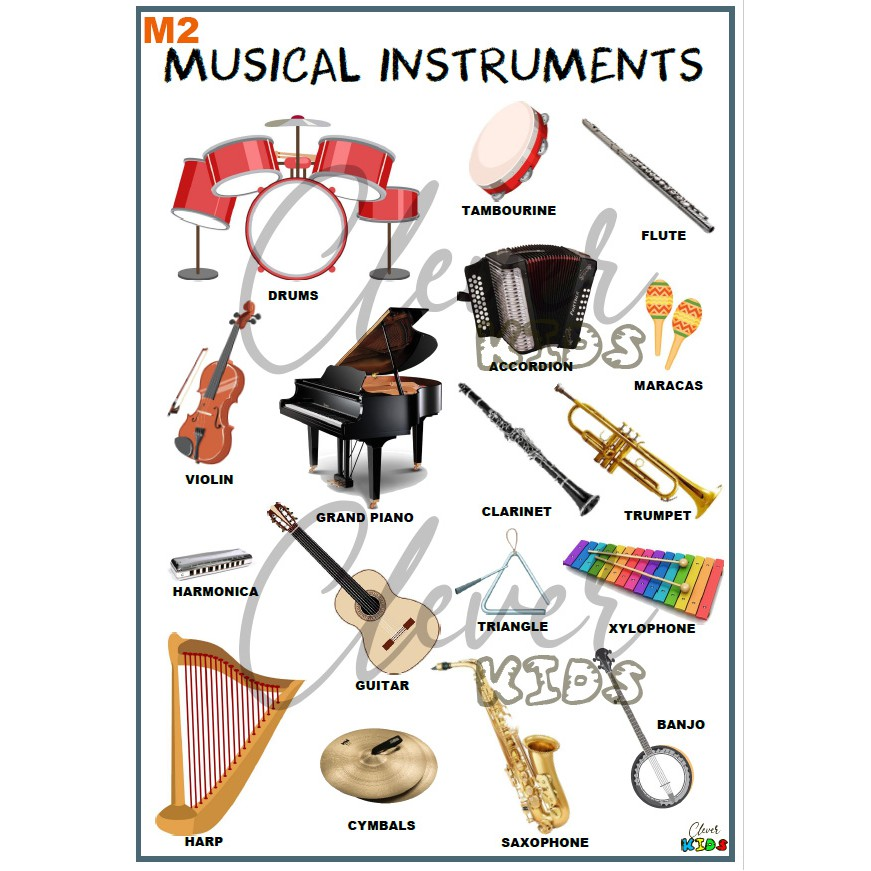

# Content

This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time

Description of columns in the file:

1)reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

2)asin - ID of the product, e.g. 0000013714

3)reviewerName - name of the reviewer

4)helpful - helpfulness rating of the review, e.g. 2/3

5)reviewText - text of the review

6)overall - rating of the product

7)summary - summary of the review

8)unixReviewTime - time of the review (unix time)

9)reviewTime - time of the review (raw)

# Task

You have to perform Sentimental Analysis for this data. Help the organization to understand better about their customer feedback's So that they can concentrate on those issues customer's are facing. Build the model which has highest accuracy in classifying the feedback as positive,Negative and neutral.

Task :1

You have to categorize opinions expressed in feedback forums.

Task :2

You have to classify individual comments/reviews and you have to determine overall rating based on individual comments/reviews.

This is the Problem Statement given by ISRO to classify the customer comments. This would be helpful for the organization to understand Customer feedbacks.

Review Analysis(NLP) of musical instrument reviews from the amazon dataset.Observing performances of NaiveBayes (MultinomialNB), Random Forest Classifier and Logistic Regression under use of Count and tf-idf vectorizers.

# Importing required Dependencies/Libraries

In [11]:
import numpy as np # used to create numpy arrays
import pandas as pd # used to create pandas dataframe/analyze
import matplotlib.pyplot as plt # used for plots aand graphs
import seaborn as sns # used for Data Visualization
import spacy # acts as one-stop-shop for various tasks used in NLP projects such as Tokenization etc etc
from wordcloud import WordCloud # WC or Text Cloud is visuals display of text data.
from PIL import Image # Psychological Information Library 
import re # Used to work with regular expressions
import os
import nltk 
#Natural Language Toolkit(NLTK) used for building python programs that work with human lang data applying in statistical NLP
from nltk.tokenize import WordPunctTokenizer
#We are ableto extract the tokens from string of words or sentences inthe form of Alphabetic & NonAlphabetic characters using tokenize. 
from textblob import TextBlob # Used for Processing Textual Data
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer #Splits a string into substrings using a regular expression
from nltk.stem import WordNetLemmatizer
#process of grouping together the d/f inflected forms of a word so they canbe analysed as a single item, identified bythe word's lemma, or dictionary form
from nltk.corpus import stopwords # English words which does not add much meaning to a sentence
import string
from string import punctuation#Pre-initialised string used as a String-Constant
import collections 
from collections import Counter # A dict subclass for counting hashable objects
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# CV - Method to convert text to numerical data
# Tfid - will tokenize documents, learn the vocabulary and inverse document frequency weightings,and allow you to encode new documents.

## Loading the Dataset to pandas Dataframe

In [12]:
df=pd.read_csv(r'/content/drive/MyDrive/ML_Projects/Amazon Musical Instrument Reviews/Musical_instruments_reviews.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [13]:
#To display first 5 rows
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [14]:
#To display last 5 rows
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4.0,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


In [15]:
#To display dataset shape
df.shape

(10261, 9)

In [16]:
#To get the information of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [17]:
#To check for missing values
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [18]:
#To get the statistical values of dataset
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [19]:
#Filling the missing values with mode value
df['reviewerName'].fillna(df['reviewerName'].mode()[0], inplace = True)

In [20]:
#Filling the missing values with mode value
df['reviewText'].fillna(df['reviewText'].mode()[0], inplace = True)

In [21]:
#Again checking for missing values
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [22]:
#Imputing the rating column to our dataset
def rating(overall):
    if (int(overall <= 3)):
        return 0
    else:
        return 1
        
df['rating'] = df['overall'].apply(rating)
df = df.drop(['overall'], axis = 1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,rating
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",good,1393545600,"02 28, 2014",1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,Jake,1363392000,"03 16, 2013",1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,It Does The Job Well,1377648000,"08 28, 2013",1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,No more pops when I record my vocals.,1392940800,"02 21, 2014",1


In [23]:
df.rating.unique()

array([1, 0])

# Good vs Bad Reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


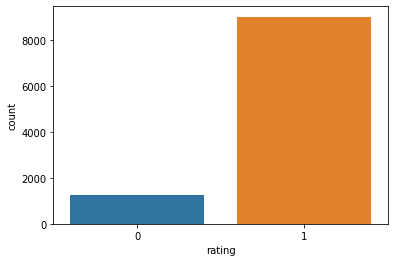

In [24]:
#Checking visually of rating column
sns.countplot(df.rating)

## Most of the reviews are good

In [25]:
#Dropping summary column
df['reviewText'] = df['reviewText'] + df['summary']
df = df.drop(['summary'], axis = 1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,unixReviewTime,reviewTime,rating
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",1393545600,"02 28, 2014",1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,1363392000,"03 16, 2013",1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,1377648000,"08 28, 2013",1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014",1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,1392940800,"02 21, 2014",1


In [28]:
df.reviewText.describe()

count                                                 10261
unique                                                10261
top       Not much to write about here, but it does exac...
freq                                                      1
Name: reviewText, dtype: object

In [30]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,unixReviewTime,reviewTime,rating
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",1393545600,"02 28, 2014",1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,1363392000,"03 16, 2013",1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,1377648000,"08 28, 2013",1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014",1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,1392940800,"02 21, 2014",1


In [31]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,unixReviewTime,reviewTime,rating
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.Five Stars",1405814400,"07 20, 2014",1
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,1404259200,"07 2, 2014",1
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,1405987200,"07 22, 2014",1
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",1404172800,"07 1, 2014",1
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",1405468800,"07 16, 2014",1


# Word Cloud

In [32]:
wc_string = df['reviewText'].str.cat(sep=' ')

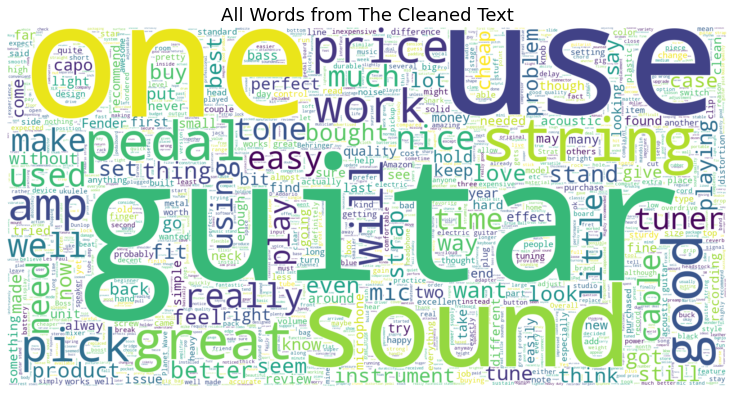

In [33]:
wc = WordCloud(width=1600, height=800,background_color="white", max_words=2000).generate(wc_string)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('All Words from The Cleaned Text', fontsize=18)
plt.show()

In [34]:
x_train,x_test,y_train,y_test = train_test_split(df.reviewText,df.rating,test_size = 0.2 , random_state = 0)

In [35]:
#bow(Bag Of Words)
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
bow_x_train = cv.fit_transform(x_train)
bow_x_test = cv.transform(x_test)

print('bow_x_train:',bow_x_train.shape)
print('bow_x_test:',bow_x_test.shape)

bow_x_train: (8208, 652152)
bow_x_test: (2053, 652152)


In [36]:
#tf-idf 
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

tfidf_x_train =tv.fit_transform(x_train)
tfidf_x_test =tv.transform(x_test)

print('tfidf_x_train:',tfidf_x_train.shape)
print('tfidf_x_test:',tfidf_x_test.shape)


tfidf_x_train: (8208, 652152)
tfidf_x_test: (2053, 652152)


# Model Fitting, Prediction and accuracy

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Naive Bayes

In [38]:
nb = MultinomialNB()

#fit
bow = nb.fit(bow_x_train, y_train)
tfidf = nb.fit(tfidf_x_train, y_train)

#predict
bow_predict = nb.predict(bow_x_test)
tfidf_predict = nb.predict(tfidf_x_test)

#accuracy
nb_bow = accuracy_score(y_test, bow_predict)
nb_tfidf = accuracy_score(y_test,tfidf_predict)

print('nb bow accuracy:', nb_bow)
print('tfidf accuracy:', nb_tfidf)

nb bow accuracy: 0.8884559181685339
tfidf accuracy: 0.8889430102289333


# Logistic Regression

In [39]:
lr = LogisticRegression(random_state=0)

#fit
bow = lr.fit(bow_x_train, y_train)
tfidf = lr.fit(tfidf_x_train, y_train)

#predict
bow_predict = lr.predict(bow_x_test)
tfidf_predict = lr.predict(tfidf_x_test)

#accuracy
lr_bow = accuracy_score(y_test, bow_predict)
lr_tfidf = accuracy_score(y_test,tfidf_predict)

print('lr bow accuracy:', lr_bow)
print('lr tfidf accuracy:', lr_tfidf)

lr bow accuracy: 0.8904042864101315
lr tfidf accuracy: 0.8889430102289333



# RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#fit
bow = rf.fit(bow_x_train, y_train)
tfidf = rf.fit(tfidf_x_train, y_train)

#predict
bow_predict = rf.predict(bow_x_test)
tfidf_predict = rf.predict(tfidf_x_test)

#accuracy
rf_bow = accuracy_score(y_test, bow_predict)
rf_tfidf = accuracy_score(y_test,tfidf_predict)

print('rf bow accuracy:', rf_bow)
print('rf tfidf accuracy:', rf_tfidf)

rf bow accuracy: 0.8889430102289333
rf tfidf accuracy: 0.8889430102289333


In [41]:
data = {'accuracy': [nb_bow * 100, nb_tfidf * 100, rf_bow * 100, rf_tfidf * 100, lr_bow * 100, lr_tfidf * 100],
                   'model': ['naive bayes bow', 'naive bayes tfidf', 'random forest bow', 'random forest tfidf', 
                                'logit bow', 'logit tfidf']}
df = pd.DataFrame(data, columns = ['accuracy', 'model'])
df.head(8)

,accuracy,model
0,88.845592,naive bayes bow
1,88.894301,naive bayes tfidf
2,88.894301,random forest bow
3,88.894301,random forest tfidf
4,89.040429,logit bow
5,88.894301,logit tfidf


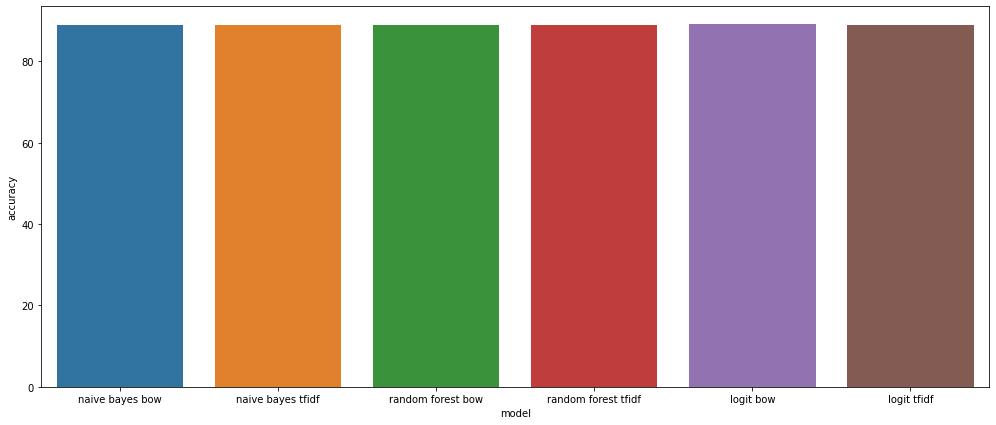

In [42]:
# Visuals of model accuracies
plt.figure(figsize = (17,7))
sns.barplot(y = df.accuracy, x = df.model)

# Around the accuracy of 89%